In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
!pip install word2number

In [3]:
from word2number import w2n

In [4]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
df["experience"] = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [7]:
import math

median_test = math.floor(df.experience.median())
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(median_test)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,4.0,7,72000
7,11,7.0,8,80000


In [8]:
reg = LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [9]:
reg.coef_

array([3109.71092681, 1875.91593526, 2078.42821483])

In [10]:
reg.intercept_

18026.37088332392

In [11]:
reg.predict([[2,9,6]])

C:\Users\KIIT\Downloads\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53599.60544327])

In [12]:
reg.predict([[12,10,10]])

C:\Users\KIIT\Downloads\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([94886.34350592])

In [13]:
X= df.iloc[:,:-1]
Y= df.iloc[:,-1].values
Y=Y.reshape(-1,1)
print(X)
print(Y)
Y

   experience  test_score(out of 10)  interview_score(out of 10)
0           0                    8.0                           9
1           0                    8.0                           6
2           5                    6.0                           7
3           2                   10.0                          10
4           7                    9.0                           6
5           3                    7.0                          10
6          10                    4.0                           7
7          11                    7.0                           8
[[50000]
 [45000]
 [60000]
 [65000]
 [70000]
 [62000]
 [72000]
 [80000]]


array([[50000],
       [45000],
       [60000],
       [65000],
       [70000],
       [62000],
       [72000],
       [80000]], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
y_pred = reg.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

392719.57848497486

In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


0.9945644348998619

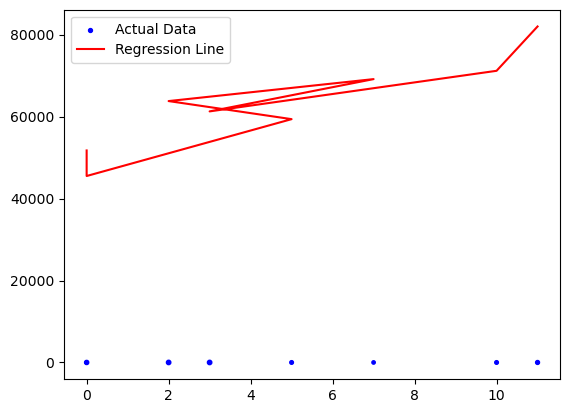

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df["experience"],df["test_score(out of 10)"],df["interview_score(out of 10)"],color="blue",label="Actual Data")
plt.plot(df["experience"],reg.predict(X),color="red", label="Regression Line")
plt.legend()
plt.show()

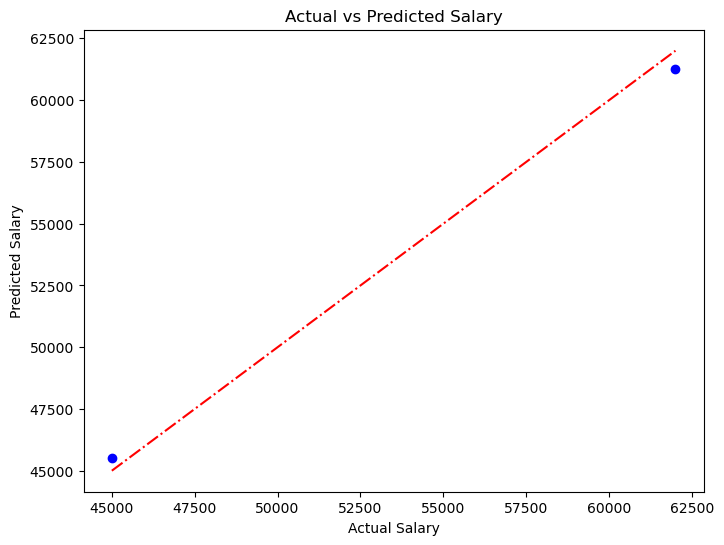

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-.')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

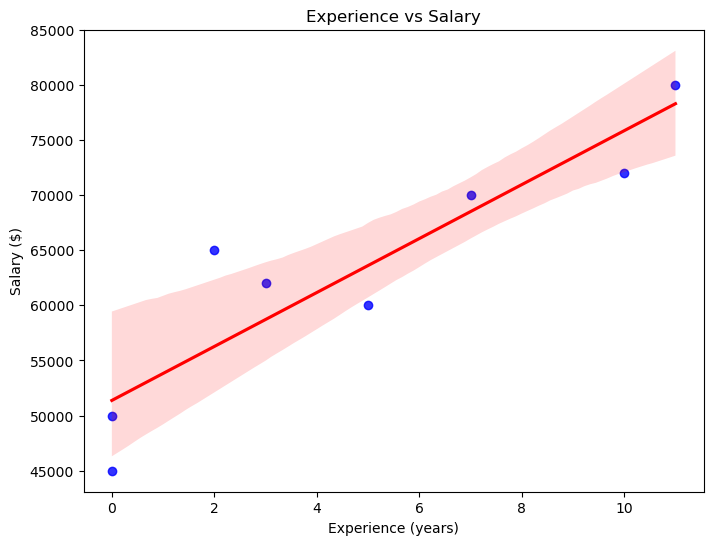

In [20]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.regplot(x='experience', y='salary($)', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Experience vs Salary')
plt.xlabel('Experience (years)')
plt.ylabel('Salary ($)')
plt.show()